# COMP4304 First Project 
## Name: Ahmed Julkernain 
## Student no: 202126082
## Project Partner: Md Golam Sharier Nirjon 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df=pd.read_csv("tely10.csv")
df.head()

,year,name,bib,city,gun_time,chip_time,overall_place,gender_place,division,division_place
0,2019,Colin Fewer,3492,Paradise,0:49:49,0:49:49,1,1,LM40-44,1/170
1,2019,Graydon Snider,1477,Montreal,0:51:11,0:51:11,2,2,LM35-39,1/216
2,2019,Matt Noseworthy,2431,St. John's,0:51:13,0:51:13,3,3,LM20-24,1/83
3,2019,Blaine Penny,977,Calgary,0:53:42,0:53:40,4,4,LM45-49,1/161
4,2019,Anne Johnston,1653,St. John's,0:54:25,0:54:24,5,1,LF35-39,1/312


### Data preparation for Linear Regression analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46654 entries, 0 to 46653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            46654 non-null  int64 
 1   name            46654 non-null  object
 2   bib             46654 non-null  int64 
 3   city            46654 non-null  object
 4   gun_time        46654 non-null  object
 5   chip_time       46654 non-null  object
 6   overall_place   46654 non-null  int64 
 7   gender_place    46654 non-null  int64 
 8   division        46654 non-null  object
 9   division_place  46654 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.6+ MB


In [4]:
df=df.sort_values(by='year')

seen_cities = set()
new_cities_by_year = {}  
for year in df['year'].unique():
    current_year_cities = set(df[df['year'] == year]['city'])
    new_cities = current_year_cities - seen_cities
    new_cities_by_year[year] = len(new_cities)  
    seen_cities.update(current_year_cities)

# Convert the dictionary to a DataFrame for easier merging
df_new_cities = pd.DataFrame(list(new_cities_by_year.items()), columns=['year', 'new_cities'])

df_new_cities



,year,new_cities
0,2005,157
1,2006,94
2,2007,83
3,2008,78
4,2009,77
5,2010,95
6,2011,91
7,2012,120
8,2013,101
9,2014,100


In [5]:
# data is clearn that is a good sign 

#geographical reach per year 
Geog_reach=df.groupby("year")["city"].nunique().reset_index() 
Geog_reach 

Geog_reach['new coming']=df_new_cities['new_cities']
Geog_reach.sort_values(by="year",ascending=False)

,year,city,new coming
14,2019,318,49
13,2018,331,86
12,2017,347,74
11,2016,336,68
10,2015,333,83
9,2014,351,100
8,2013,333,101
7,2012,335,120
6,2011,268,91
5,2010,245,95


In [6]:
from sklearn.linear_model import LinearRegression 

x=Geog_reach['year'].values.reshape(-1,1) 
y=Geog_reach['city'].values 

model=LinearRegression() 
model.fit(x,y)#we have now trained the model 


slope=model.coef_[0] 


### Make predictions for the next year 

In [7]:
x_predict_2020 = np.array([[2020]])
y_predict_2020 = model.predict(x_predict_2020)
 
another_x=Geog_reach['year'].values.reshape(-1,1) 
another_y=Geog_reach['new coming'].values 

model1=LinearRegression() 
model1.fit(another_x,another_y) 

x_predict_nc = np.array([[2020]])
y_predict_nc = model1.predict(x_predict_2020)

Geog_reach.loc[15, 'city']=y_predict_2020  # set last point to 2 pi
Geog_reach.loc[15, 'year']=2020
Geog_reach.loc[15, 'new coming']=y_predict_nc

Geog_reach


,year,city,new coming
0,2005.0,157.000000,157.000000
1,2006.0,172.000000,94.000000
2,2007.0,172.000000,83.000000
3,2008.0,191.000000,78.000000
4,2009.0,215.000000,77.000000
5,2010.0,245.000000,95.000000
6,2011.0,268.000000,91.000000
7,2012.0,335.000000,120.000000
8,2013.0,333.000000,101.000000
9,2014.0,351.000000,100.000000


### First visualization

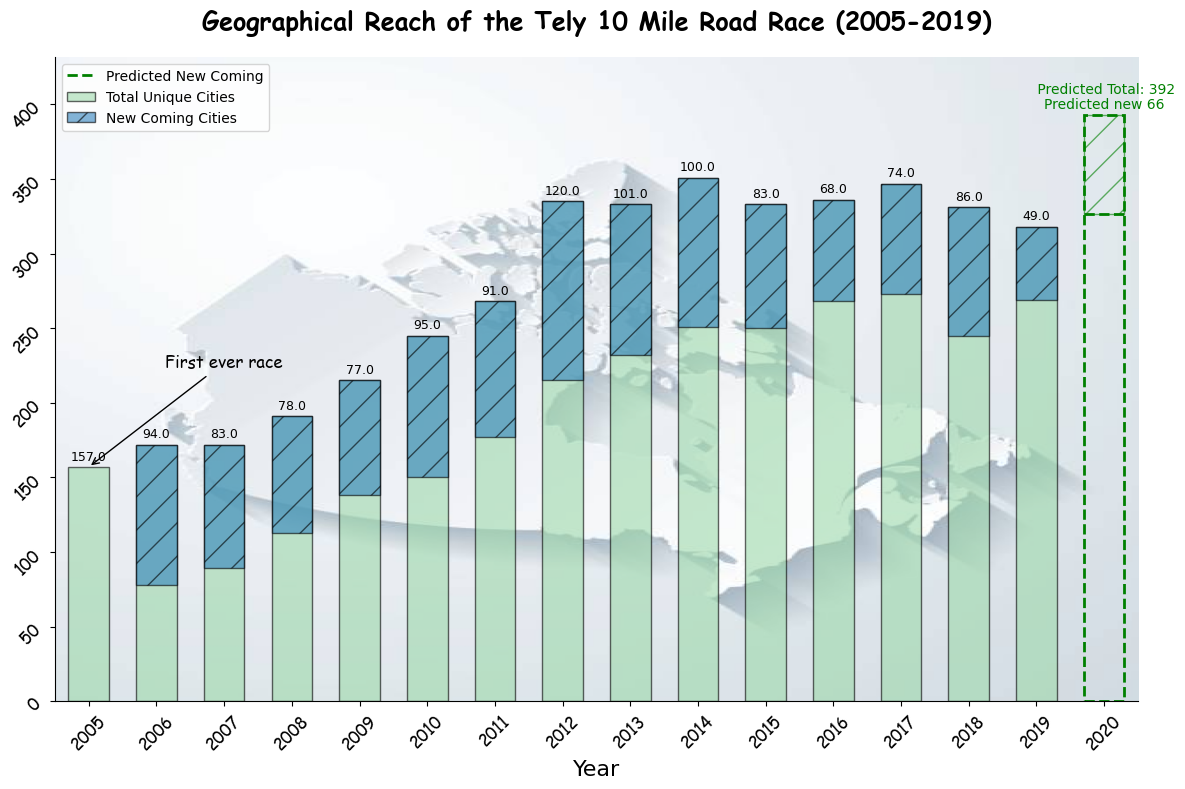

In [8]:
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

img=mpimg.imread("pic2.jpg")

fig, ax=plt.subplots(figsize=(12, 8))


years=Geog_reach['year'].values
total_unique_cities=Geog_reach['city'].values
new_cities=Geog_reach['new coming'].values

#the imaging code has been tweaked for adjustment but I had to use chatgpt for this as I did not know how to add images. It was not covered in the course. 
left=min(years) - 0.5
right=max(years) + 0.5
bottom=0
top=max(max(total_unique_cities), max(total_unique_cities - new_cities)) * 1.1

total_color='#9ED9AC'
new_color='#3182bd'

ax.imshow(img, aspect='auto', extent=[left, right, bottom, top], zorder=0)

for i, (year, total, new) in enumerate(zip(years, total_unique_cities, new_cities)):
    if year==2020:
        ax.bar(year, new, bottom=total-new, hatch='/', width=0.6, alpha=0.6, edgecolor='green', facecolor='none')
    elif year==2005:
        ax.bar(year, total, color=total_color, edgecolor='black', width=0.6, alpha=0.6)
    else:
        ax.bar(year, total, color=total_color, edgecolor='black', width=0.6, alpha=0.6, label="Total Unique Cities" if i == 1 else "")
        ax.bar(year, new, bottom=total-new, color=new_color, edgecolor='black', hatch='/', width=0.6, alpha=0.6, label="New Coming Cities" if i == 1 else "")


predicted_value_2020 = Geog_reach[Geog_reach['year']==2020]['city'].values[0]
rect=patches.Rectangle((2020-0.3, 0), 0.6, predicted_value_2020, linewidth=2, edgecolor='green', facecolor='none', linestyle='--')
ax.add_patch(rect)
ax.text(2020, predicted_value_2020 + 15, " Predicted Total: 392",ha='center',color="green")
ax.text(2020, predicted_value_2020 + 5, "\nPredicted new 66",ha='center',color="green")


ax.set_title('Geographical Reach of the Tely 10 Mile Road Race (2005-2019)', fontsize=18, fontweight='bold',fontname="Comic Sans MS",pad=20)
ax.set_xlabel('Year', fontsize=16)
plt.xticks(years, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

new_cities_height=predicted_value_2020 - y_predict_nc
ax.hlines(new_cities_height, 2020-0.3, 2020+0.3, colors='green', linestyles='dashed', label="Predicted New Coming",linewidth=2.0)

plt.xticks(fontsize=12, fontname='Comic Sans MS', rotation=45)
plt.yticks(fontsize=12, fontname='Comic Sans MS', rotation=45)

for i, txt in enumerate(new_cities):
    if years[i] != 2020:
        ax.annotate(txt, (years[i], total_unique_cities[i] + 5), ha='center', fontsize=9, color="black")


handles, labels=ax.get_legend_handles_labels()
by_label=dict(zip(labels, handles)) 
ax.legend(by_label.values(), by_label.keys())


height_2005 = total_unique_cities[0]  

x_pos_2005=2005

#I have used the help of chatgpt to write the following lines of code regarding how to add an arrow to the first bar. 
ax.annotate('First ever race',
            xy=(x_pos_2005, height_2005), xycoords='data',
            xytext=(x_pos_2005 + 2, height_2005 + 70), textcoords='data', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0", color="black"),  
            ha='center', va='center',
            fontsize=12, color="black", fontname="Comic Sans MS")

plt.savefig('myplot.png', dpi=300)
plt.tight_layout()
plt.show()


### Second visualization

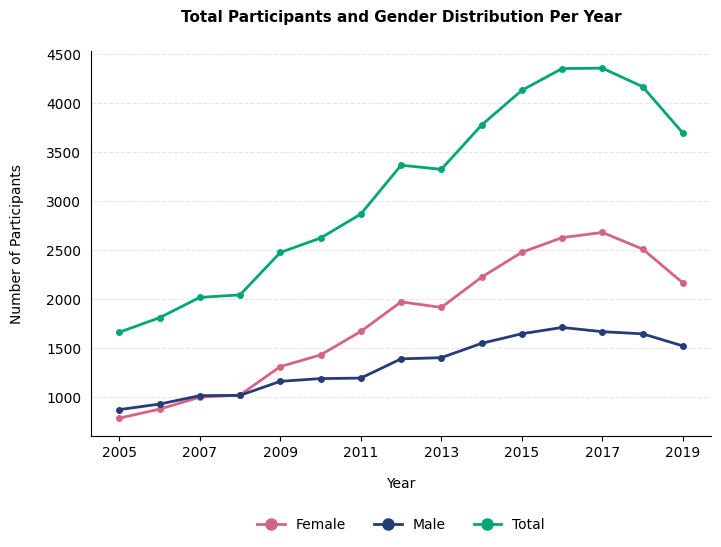

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('tely10.csv')
df['gender'] = df['division'].apply(lambda x: x[1] if x[1] in ['M', 'F'] else None)
df['year'] = df['year'].astype(str)

yearly_counts = df.groupby('year').size()
gender_counts = df.groupby(['year', 'gender']).size().unstack()

fig, ax = plt.subplots(figsize=(8, 5))  

gender_counts.plot(kind='line', marker='o', ax=ax, linewidth=2, markersize=4, color=['#D36582', '#253C78'])
yearly_counts.plot(kind='line', marker='o', ax=ax, color='#00A676', label='Total', linewidth=2, markersize=4) 

ax.set_xlabel('Year', labelpad=12)
ax.set_ylabel('Number of Participants', labelpad=16)
ax.set_title("Total Participants and Gender Distribution Per Year", fontweight='bold', fontsize=11, pad=21)


ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('none')

ax.legend( frameon=False, loc='upper center', labels=['Female', 'Male', 'Total'], bbox_to_anchor=(0.5, -0.18), ncol=3, fontsize='medium', markerscale =2)
ax.grid(axis='y', linestyle='--', alpha = 0.3)

plt.show()

### Third Visualization

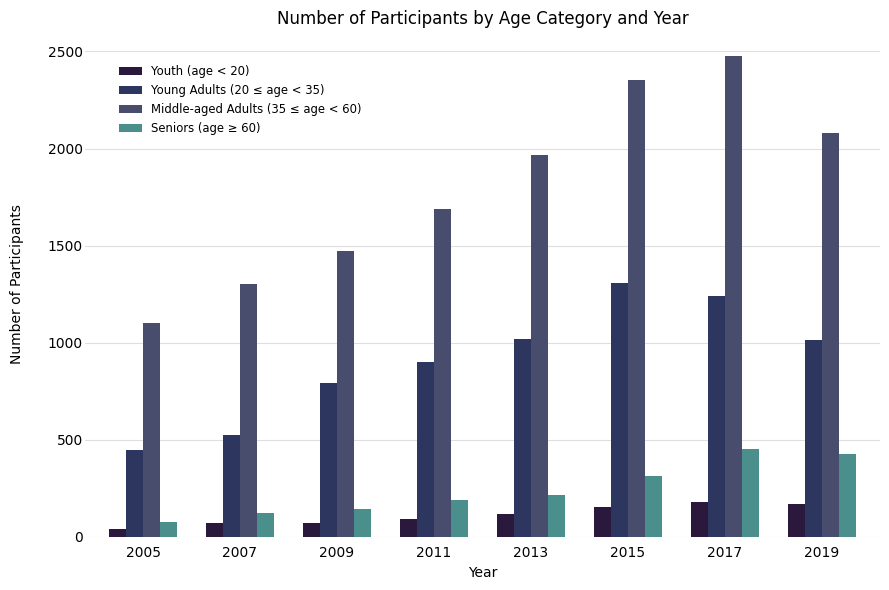

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('tely10.csv')

def map_age_category(division):
    if '<20' in division or '-19' in division:
        return 'Youth'
    elif '20-24' in division or '25-29' in division or '30-34' in division:
        return 'Young Adults'
    elif '35-39' in division or '40-44' in division or '45-49' in division or '50-54' in division or '55-59' in division:
        return 'Middle-aged Adults'
    elif '60-64' in division or '65-69' in division or '70-74' in division or '75-79' in division or '80+' in division:
        return 'Seniors'

df['age category'] = df['division'].apply(map_age_category)

age_category_counts = df.groupby(['year', 'age category']).size().unstack(fill_value=0).reset_index()
age_category_counts.reset_index(drop=True, inplace=True)
age_category_counts.columns.name = None
age_category_counts = age_category_counts.reindex(columns=['year', 'Youth', 'Young Adults', 'Middle-aged Adults', 'Seniors'])
indices_to_remove = [1,3,5,7,9,11,13]
age_category_counts = age_category_counts.drop(indices_to_remove)
age_category_counts

colors = {
    'Youth': '#2B193D',
    'Young Adults': '#2C365E',
    'Middle-aged Adults': '#484D6D',
    'Seniors': '#4B8F8C'
}
age_category_counts.plot(x='year', kind='bar', figsize=(9, 6), 
                         color=[colors[category] for category in age_category_counts.columns[1:]],width=0.7, zorder=3)

plt.title('Number of Participants by Age Category and Year')
plt.xlabel('Year')
plt.ylabel('Number of Participants', labelpad=17)
plt.legend(
    labels=['Youth (age < 20)', 'Young Adults (20 ≤ age < 35)', 'Middle-aged Adults (35 ≤ age < 60)', 'Seniors (age ≥ 60)'],
    loc='upper left',
    fontsize='small',
    markerscale=1.5,
    frameon=False,
    bbox_to_anchor=(0.03, 0.955),
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False, pad=-2)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', linewidth=0.8, alpha=0.4, zorder=1) 

plt.tight_layout()
plt.show()

### Attribution 

- https://www.nlaa.ca/tely10/ for getting insight on the project <br>
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html used this to make the third visualization as basis <br>
- Chatgpt for debugging and understanding how to do some complex things such as dashed line for the "prediction" bar
- https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html 